<a href="https://colab.research.google.com/github/haroldpc258/Bilinear-Interpolation-Image-Resizing-Python/blob/master/InterpolacionBilineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Interpolación Bilineal

Text(0.5, 1.0, 'Interpolada\n')

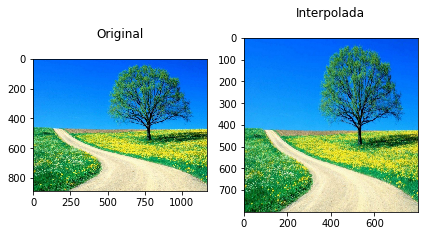

In [ ]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt


img = io.imread('/content/drive/MyDrive/Peña_Harold_DIP_G1_2021_I/paisaje.jpg')
m, n, ch = np.shape(img);

filOut, colOut = 800, 800;
imgOut = np.zeros((filOut,colOut,ch), dtype=np.uint8)

scale_x, scale_y = float(m)/filOut, float(n)/colOut;

for channel in range(ch):
  for col in range(colOut):
    for fil in range(filOut):

      #Punto origen coordenada
      x = fil*scale_x
      y = col*scale_y


      #Coordenadas de los puntos para Interpolación
      x1 = int(x)
      x2 = min(x1 + 1, m - 1)
      y1 = int(y)
      y2 = min(y1 + 1, n - 1)

      if x2 != x1:
        #Interpolación
        FR1 = ((x2 - x)/(x2-x1))*img[x1, y1, channel] + ((x - x1)/(x2-x1))*img[x1, y2, channel];
        FR2 = ((x2 - x)/(x2-x1))*img[x2, y1, channel] + ((x - x1)/(x2-x1))*img[x2, y2, channel];
        imgOut[fil, col, channel] = int((y2 - y)*FR1 + (y - y1)*FR2);
      else:
        #Interpolación
        FR1 = ((x2 - x)/(x2-x))*img[x1, y1, channel] + ((x - x1)/(x2-x))*img[x1, y2, channel];
        FR2 = ((x2 - x)/(x2-x))*img[x2, y1, channel] + ((x - x1)/(x2-x))*img[x2, y2, channel];
        imgOut[fil, col, channel] = int((y2 - y)*FR1 + (y - y1)*FR2);



plt.figure()
plt.subplot(1,2,1)
show_ = io.imshow(img)
plt.title('Original\n')
plt.subplot(1,2,2)
show_Inter = io.imshow(imgOut)
plt.title('Interpolada\n')